<a href="https://colab.research.google.com/github/krishnamanc/Pytorch/blob/main/3_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# minst dataset (60,000 train images, 10,000 test images)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from torch.utils.data.dataloader import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Convert mnist image files into a tensor of 4-Dimensions
transform = transforms.ToTensor()

In [ ]:
# Train data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 115947043.84it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29430440.68it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31462899.48it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5632918.03it/s]


Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [ ]:
# Test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
pwd

'/content'

In [ ]:
ls

sample_data/


In [ ]:
cd ../

/


In [ ]:
pwd

'/'

In [ ]:
ls

bin@       cuda-keyring_1.0-1_all.deb  home/    lib64@   NGC-DL-CONTAINER-LICENSE  run/   tmp/
boot/      datalab/                    kaggle/  libx32@  opt/                      sbin@  tools/
cnn_data/  dev/                        lib@     media/   proc/                     srv/   usr/
content/   etc/                        lib32@   mnt/     root/                     sys/   var/


In [ ]:
cd cnn_data

/cnn_data


In [ ]:
ls

MNIST/


In [ ]:
cd ../

/


In [ ]:
ls

bin@       cuda-keyring_1.0-1_all.deb  home/    lib64@   NGC-DL-CONTAINER-LICENSE  run/   tmp/
boot/      datalab/                    kaggle/  libx32@  opt/                      sbin@  tools/
cnn_data/  dev/                        lib@     media/   proc/                     srv/   usr/
content/   etc/                        lib32@   mnt/     root/                     sys/   var/


In [ ]:
cd content

/content


In [ ]:
# Create a batch size for images
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [ ]:
# Define our CNN Model
# Describe convolutional layer and what its doing (2 cnn layers)
conv1 = nn.Conv2d(1, 12, 3, 1) # 1 feature in, 12 features out, kernel size is 3, stride length(brush size(1) each time)
conv2 = nn.Conv2d(12, 22, 3, 1)# 12 features in, 22 features out, kernel size is 3, stride length(brush size(1) each time)

In [ ]:
# Grab 1 MNIST record or image
for i, (X_Train, y_train) in enumerate(train_data):
  break

In [ ]:
X_Train.shape

torch.Size([1, 28, 28])

In [ ]:
# convert to 4d
x = X_Train.view(1,1,28,28) # 1 batch of 1 image of 28*28 size

In [ ]:
# Perform our first convolution
x = F.relu(conv1(x)) # rectified Linear unit for our activation function

In [ ]:
# 1 single image, 12 is the filters we asked for, 26*26
x.shape

torch.Size([1, 12, 26, 26])

In [ ]:
# pass through the pooling(shrinking the imformation) layer
x = F.max_pool2d(x,2,2) # kernel size is 2 and stride size is 2

In [ ]:
x.shape # 26 / 2 = 13

torch.Size([1, 12, 13, 13])

In [ ]:
# Do our second convolutional layer
x = F.relu(conv2(x))

In [ ]:
x.shape # we didn't set the padding, so we lose 2 pixels around the outside of the image after the convolution

torch.Size([1, 22, 11, 11])

In [ ]:
# Do our second pooling layer
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape # 11 / 2 = 5.5

torch.Size([1, 22, 5, 5])

In [ ]:
(((28-2) / 2) -2) / 2

5.5

In [ ]:
22*5*5

550

In [ ]:
# Model Class
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 12, 3, 1)
    self.conv2 = nn.Conv2d(12, 22, 3, 1)
    # Fully connected layer (torch.Size([1, 22, 5, 5])) here, 22*5*5 = 550
    self.fc1 = nn.Linear(550, 320)
    self.fc2 = nn.Linear(320, 160)
    self.fc3 = nn.Linear(160, 80)
    self.fc4 = nn.Linear(80, 40)
    self.fc5 = nn.Linear(40, 20)
    self.fc6 = nn.Linear(20, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernal and stride length of 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernal and stride length of 2

    # Re-View to flatten it out
    X = X.view(-1, 550) # -1 so that we can vary the batch size

    # Fully Connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = F.relu(self.fc3(X))
    X = F.relu(self.fc4(X))
    X = F.relu(self.fc5(X))
    X = self.fc6(X)
    return F.log_softmax(X, dim=1)

In [ ]:
torch.manual_seed(82)

In [ ]:
# Create an Instance of our model
model = Model()
model

Model(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(12, 22, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=550, out_features=320, bias=True)
  (fc2): Linear(in_features=320, out_features=160, bias=True)
  (fc3): Linear(in_features=160, out_features=80, bias=True)
  (fc4): Linear(in_features=80, out_features=40, bias=True)
  (fc5): Linear(in_features=40, out_features=20, bias=True)
  (fc6): Linear(in_features=20, out_features=10, bias=True)
)

In [ ]:
# Set the criterion of model to measure the error (Loss)
# how far off the predictions are from the data
loss_fn = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate(if error doesn't go down after some epochs, reduce learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# one epoch means, one forward pass through the neural network

In [ ]:
for param in model.parameters():
    print(type(param), param.size())

<class 'torch.nn.parameter.Parameter'> torch.Size([12, 1, 3, 3])
<class 'torch.nn.parameter.Parameter'> torch.Size([12])
<class 'torch.nn.parameter.Parameter'> torch.Size([22, 12, 3, 3])
<class 'torch.nn.parameter.Parameter'> torch.Size([22])
<class 'torch.nn.parameter.Parameter'> torch.Size([320, 550])
<class 'torch.nn.parameter.Parameter'> torch.Size([320])
<class 'torch.nn.parameter.Parameter'> torch.Size([160, 320])
<class 'torch.nn.parameter.Parameter'> torch.Size([160])
<class 'torch.nn.parameter.Parameter'> torch.Size([80, 160])
<class 'torch.nn.parameter.Parameter'> torch.Size([80])
<class 'torch.nn.parameter.Parameter'> torch.Size([40, 80])
<class 'torch.nn.parameter.Parameter'> torch.Size([40])
<class 'torch.nn.parameter.Parameter'> torch.Size([20, 40])
<class 'torch.nn.parameter.Parameter'> torch.Size([20])
<class 'torch.nn.parameter.Parameter'> torch.Size([10, 20])
<class 'torch.nn.parameter.Parameter'> torch.Size([10])


In [ ]:
import time
start_time = time.time()

# Create Variables To Track Things

# for epoch in a range , lalalalala
#  Train our model!
# Epochs? (one run through all the training data in our network)
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for epoch in range(epochs):

  trn_corr = 0
  tst_corr = 0

  # call model.train
  model.train()

  # we have batches here
  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1

    #1. Do the forward pass
    y_pred = model(X_train) # 2d input

    #2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of coorect predictions
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch
    trn_corr += batch_corr # keep track as we go along in training

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    train_losses.append(loss.detach().numpy())
    train_correct.append(trn_corr)
    ### Test time!
    # call model.eval

  model.eval()

  with torch.inference_mode():

    for b,(X_test, y_test) in enumerate(test_loader):
      # Do the forward pass
      test_pred = model(X_test)

      # Calculate the loss
      test_loss = loss_fn(test_pred, y_test)

      predicted = torch.max(test_pred.data, 1)[1] # add up the number of coorect predictions
      tst_corr += (predicted == y_test).sum() # keep track as we go along in training


      test_losses.append(test_loss.detach().numpy())
      test_correct.append(tst_corr)
      if b%600 == 0:
        # print out what's happening
        print(f"Epoch: {epoch} | Batch: {b} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f}")

current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0 | Batch: 0 | Train loss: 0.0039 | Test loss: 0.0029
Epoch: 0 | Batch: 600 | Train loss: 0.0039 | Test loss: 0.0275
Epoch: 1 | Batch: 0 | Train loss: 0.0021 | Test loss: 0.0198
Epoch: 1 | Batch: 600 | Train loss: 0.0021 | Test loss: 0.0143
Epoch: 2 | Batch: 0 | Train loss: 0.0006 | Test loss: 0.0077
Epoch: 2 | Batch: 600 | Train loss: 0.0006 | Test loss: 0.0048
Epoch: 3 | Batch: 0 | Train loss: 0.0001 | Test loss: 0.0042
Epoch: 3 | Batch: 600 | Train loss: 0.0001 | Test loss: 0.0109
Epoch: 4 | Batch: 0 | Train loss: 0.0000 | Test loss: 0.0001
Epoch: 4 | Batch: 600 | Train loss: 0.0000 | Test loss: 0.0009
Epoch: 5 | Batch: 0 | Train loss: 0.0001 | Test loss: 0.0030
Epoch: 5 | Batch: 600 | Train loss: 0.0001 | Test loss: 0.0009
Epoch: 6 | Batch: 0 | Train loss: 0.0001 | Test loss: 0.0001
Epoch: 6 | Batch: 600 | Train loss: 0.0001 | Test loss: 0.0277
Epoch: 7 | Batch: 0 | Train loss: 0.0016 | Test loss: 0.0002
Epoch: 7 | Batch: 600 | Train loss: 0.0016 | Test loss: 0.0051
Epoch: 8

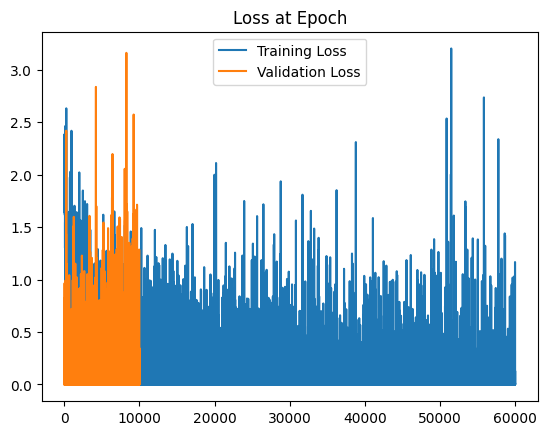

In [ ]:
# Graph the loss at each epoch
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

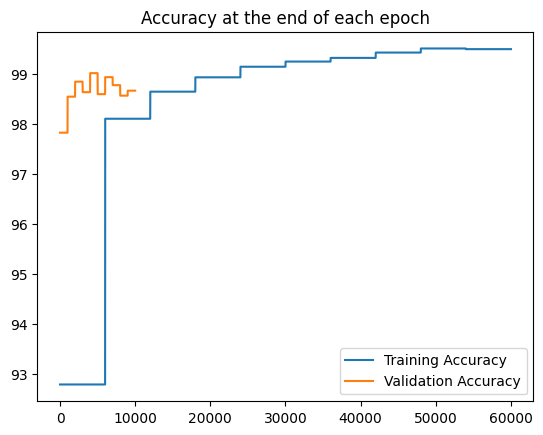

In [ ]:
# graph of accuracy
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [ ]:
test_load_everything = DataLoader(test_data, batch_size=1000, shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [ ]:
# Did it correct
correct.item()

9866

In [ ]:
correct.item()/len(test_data)*100

98.66

In [ ]:
# Grab an image
test_data[4143] # Tensor with an image in it.... at end it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# Grab the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
# Reshape it
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

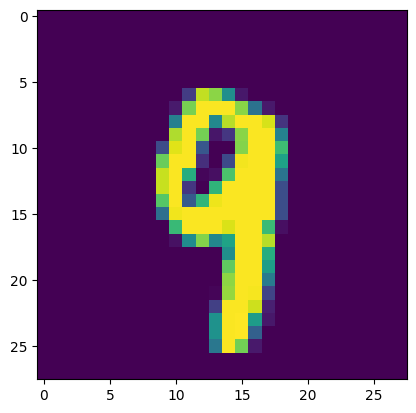

In [ ]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [ ]:
# Pass the image through our model
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[4143][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28*28 image

In [ ]:
# Check the new prediction... get probabilities
new_prediction

tensor([[-42.9492, -36.5479, -42.7564, -29.0235, -19.5813, -25.3028, -40.9603,
         -19.3884, -22.8265,   0.0000]])

In [ ]:
new_prediction.argmax()

tensor(9)

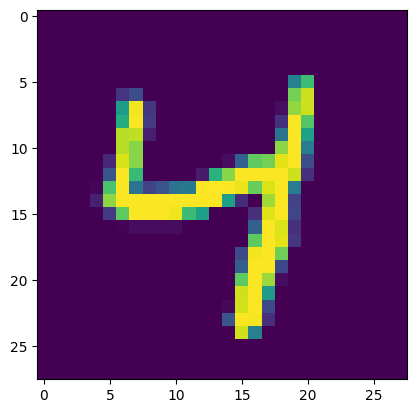

In [ ]:
# Show the image
plt.imshow(test_data[1978][0].reshape(28,28))

In [ ]:
# Pass the image through our model
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[1978][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28*28 image
    print(f"Model predicted that it is {new_prediction.argmax()}")

Model predicted that it is 4


In [ ]:
# Save our NN Model
torch.save(model.state_dict(), 'mnistmodel.pt')

In [ ]:
# Load the Saved Model
new_model = Model()

In [ ]:
new_model.load_state_dict(torch.load('mnistmodel.pt'))

<All keys matched successfully>

In [ ]:
model.eval()

Model(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(12, 22, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=550, out_features=320, bias=True)
  (fc2): Linear(in_features=320, out_features=160, bias=True)
  (fc3): Linear(in_features=160, out_features=80, bias=True)
  (fc4): Linear(in_features=80, out_features=40, bias=True)
  (fc5): Linear(in_features=40, out_features=20, bias=True)
  (fc6): Linear(in_features=20, out_features=10, bias=True)
)

In [ ]:
new_model.eval()

Model(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(12, 22, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=550, out_features=320, bias=True)
  (fc2): Linear(in_features=320, out_features=160, bias=True)
  (fc3): Linear(in_features=160, out_features=80, bias=True)
  (fc4): Linear(in_features=80, out_features=40, bias=True)
  (fc5): Linear(in_features=40, out_features=20, bias=True)
  (fc6): Linear(in_features=20, out_features=10, bias=True)
)

In [ ]:
# Pass the image through our model
new_model.eval()
with torch.no_grad():
    new_prediction = new_model(test_data[1978][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28*28 image
    print(f"Model predicted that it is {new_prediction.argmax()}")

Model predicted that it is 4


In [ ]:
from PIL import Image

In [ ]:
img = Image.open('img_3.jpg')
img_tensor = transform(img).unsqueeze(0)

In [ ]:
# Pass the image through our model
new_model.eval()
with torch.no_grad():
    new_prediction = new_model(img_tensor) # batch size of 1, 1 color channel, 28*28 image
    print(f"Model predicted that it is {new_prediction.argmax()}")

Model predicted that it is 9
